In [5]:
#이미지 데이터를 찾아서 인식할 준비를 한다. 
import os
import numpy as np

from PIL import Image
import face_recognition

dir_path = os.getenv('HOME')+'/aiffel/data/face_embedding'

pillow_path = os.getenv('HOME')+'/aiffel/face_embedding/static/'


In [6]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]  # 이미지에서 얼굴영역만 잘라냄

    return cropped_face

file_list: ['mun jae in.jpeg', 'laden.jpg', 'reagan.jpg', '김태훈.jpeg', 'trump.jpg', 'bush.jpeg', 'biden.jpg', '김태훈 .jpeg', 'obama.jpg', 'clinton.jpeg', 'images']


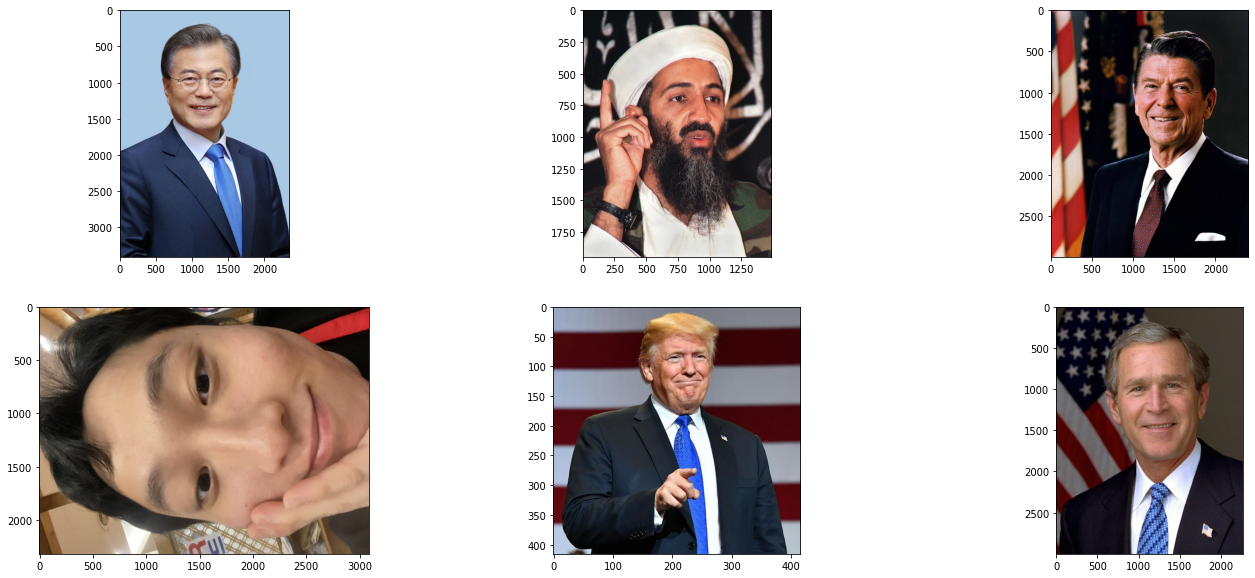

In [9]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  face_embedding = img.imread(dir_path+'/'+file_list[i])

  ax.imshow(face_embedding)
plt.show()

fig.tight_layout()

In [10]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


def get_face_embedding_dict(path):
    file_list = os.listdir(path)
    embedding_dict = {}

    for file in file_list:
        file_name = file.split('.')[0]
        file_path = os.path.join(path, file)
        face = get_gropped_face(file_path)
        embedding = get_face_embedding(face)

        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로
            embedding_dict[file_name] = embedding[0]

            pillow_image = Image.fromarray(face)
            pillow_image_path = os.path.join(pillow_path, file)
            pillow_image.save(pillow_image_path)

    return embedding_dict

[(502, 1241, 1168, 576)]


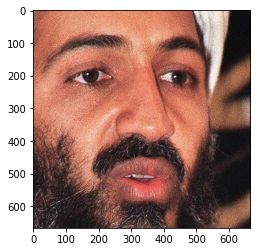

In [14]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/laden.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [18]:
def get_gropped_face(image_file):
    face_embedding = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]  # 이미지에서 얼굴영역만 잘라냄

    return cropped_face

In [21]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)



In [27]:
def get_face_embedding_dict(path):
    file_list = os.listdir(path)
    embedding_dict = {}
    for file in file_list:
        file_name = file.split('.')[0]
        file_path = os.path.join(path, file)
        face = get_gropped_face(file_path)
        embedding = get_face_embedding(face)

        if len(embedding) > 0:  
            embedding_dict[file_name] = embedding[0]

            pillow_image = Image.fromarray(face)
            pillow_image_path = os.path.join(pillow_path, file)
            pillow_image.save(pillow_image_path)

    return embedding_dict

In [31]:
def get_distance(laden, obama):
    return np.linalg.norm(embedding_dict[laden]-embedding_dict[obama], ord=2)


In [32]:
def get_sort_key_func(laden):
    def get_distance_from_name1(obama):
        return get_distance(laden, obama)

    return get_distance_from_name1

In [33]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x: sort_key_func(x[0]))
    result = []
    for i in range(top + 1):
        if i == 0: continue
        if sorted_faces[i]:
            print(f'순위 {i} : 이름({sorted_faces[i][0]}), 거리({sort_key_func(sorted_faces[i][0])})')
            result.append(sorted_faces[i][0])
    return result